In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df= pd.read_csv("/content/vehicles_data.csv")
print(df.shape)
df.head(2)

(112634, 17)


VIN (1-10)  County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N  Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D   Clark  Laughlin    NV        89029        2013  CHEVROLET   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   

              Vehicle Location Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)              NaN        12087972100  
1  POINT (-114.57245 35.16815)              NaN        32003005702

In [3]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [4]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [10]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                      int64
dtype: object

As I can see that all the above columns should not be in Numeric data type, so I should convert them into correct data type

In [11]:
df["Postal Code"]= df["Postal Code"].astype(int).astype(str)
df["Model Year"]= df["Model Year"].astype(int).astype(str)
df["DOL Vehicle ID"]= df["DOL Vehicle ID"].astype(int).astype(str)
df["2020 Census Tract"]= df["2020 Census Tract"].astype(int).astype(str)

In [12]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                           object
Model Year                                            object
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                        object
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                     object
dtype: object

In [13]:
df.describe().round(2).T

count    mean      std  min   25%   50%    75%  \
Electric Range       112634.00   87.81   102.33 0.00  0.00 32.00 208.00   
Base MSRP            112634.00 1793.44 10783.75 0.00  0.00  0.00   0.00   
Legislative District 112348.00   29.81    14.70 1.00 18.00 34.00  43.00   

                           max  
Electric Range          337.00  
Base MSRP            845000.00  
Legislative District     49.00

In [31]:
# Summary of categorical columns

categorical_columns= df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"\n{col} - value counts:")
    print(df[col].value_counts())
    print("="*100)


VIN (1-10) - value counts:
VIN (1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

County - value counts:
County
King                    59000
Snohomish               12434
Pierce                   8535
Clark                    6689
Thurston                 4126
Kitsap                   3847
Whatcom                  2840
Spokane                  2792
Benton                   1376
Island                   1307
Skagit                   1258
Clallam                   731
San Juan                  721
Jefferson                 699
Chelan                    654
Yakima                    617
Cowlitz                   569
Mason                     547
Lewis                     431
Grays Harbor              403
Kittitas                  392
Franklin                  365
Grant                     335
Wa


VIN (1-10) - value counts:
VIN (1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
7SAYGDEEXN    430
5YJYGDEEXM    428
5YJYGDEE6M    421
5YJYGDEE3M    418
7SAYGDEE8N    416
5YJYGDEE4M    416
Name: count, dtype: int64


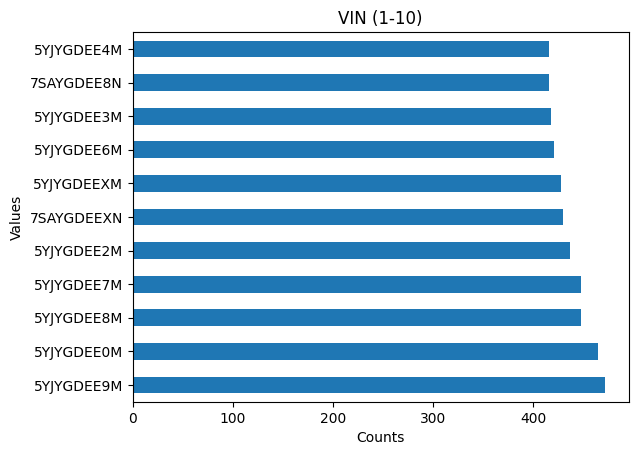


County - value counts:
County
King         59000
Snohomish    12434
Pierce        8535
Clark         6689
Thurston      4126
Kitsap        3847
Whatcom       2840
Spokane       2792
Benton        1376
Island        1307
Skagit        1258
Name: count, dtype: int64


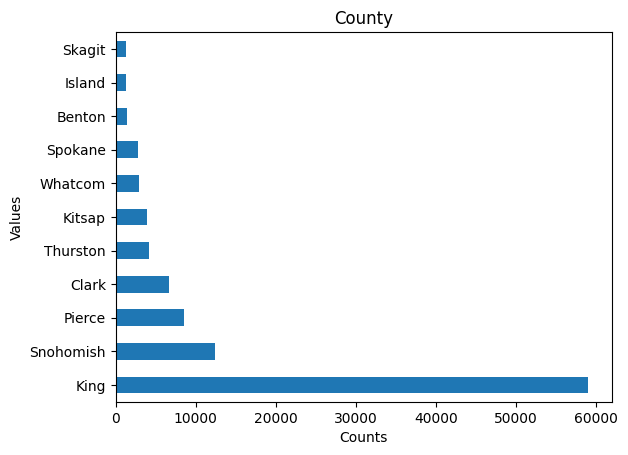


City - value counts:
City
Seattle       20305
Bellevue       5921
Redmond        4201
Vancouver      4013
Kirkland       3598
Bothell        3335
Sammamish      3292
Renton         2778
Olympia        2745
Tacoma         2379
Bellingham     1952
Name: count, dtype: int64


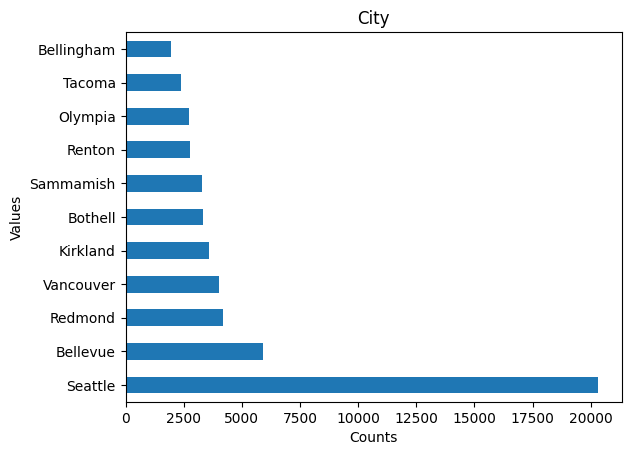


State - value counts:
State
WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
Name: count, dtype: int64


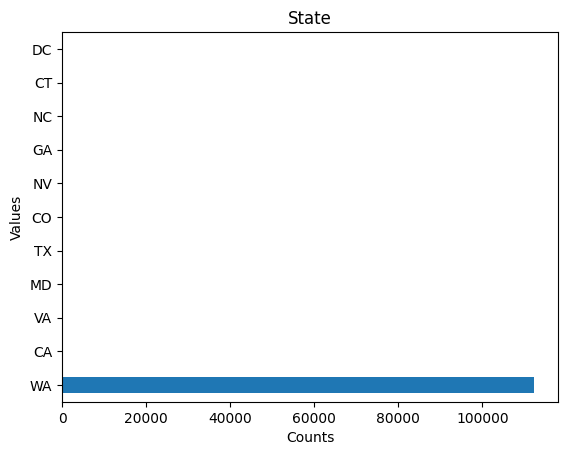


Postal Code - value counts:
Postal Code
98052    2916
98033    2059
98004    2001
98115    1880
98006    1852
98012    1850
98072    1661
98040    1639
98074    1594
98034    1578
98103    1507
Name: count, dtype: int64


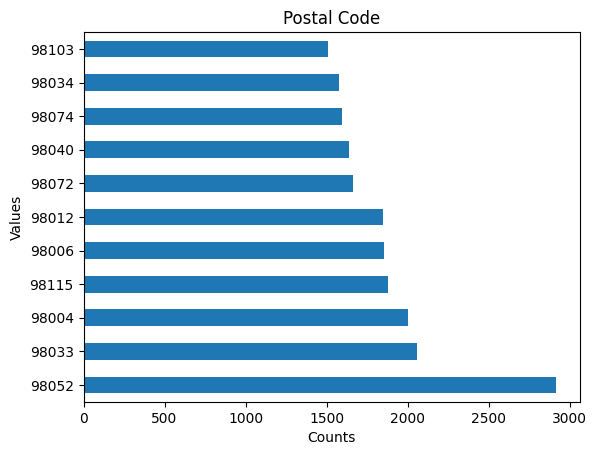


Model Year - value counts:
Model Year
2022    26530
2021    18364
2018    14246
2020    11038
2019    10266
2017     8644
2016     5735
2015     4940
2013     4691
2014     3685
2023     1886
Name: count, dtype: int64


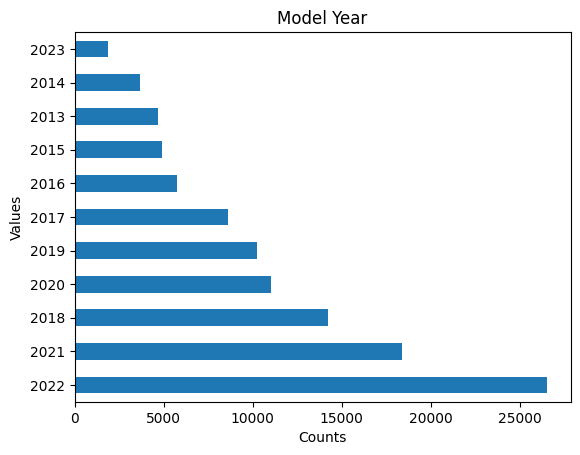


Make - value counts:
Make
TESLA         52078
NISSAN        12880
CHEVROLET     10182
FORD           5819
BMW            4680
KIA            4483
TOYOTA         4405
VOLKSWAGEN     2514
AUDI           2332
VOLVO          2288
CHRYSLER       1794
Name: count, dtype: int64


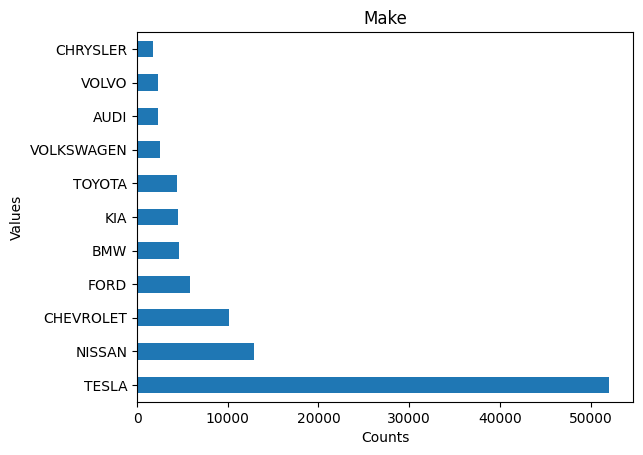


Model - value counts:
Model
MODEL 3        23135
MODEL Y        17142
LEAF           12880
MODEL S         7377
BOLT EV         4910
VOLT            4896
MODEL X         4370
PRIUS PRIME     2380
NIRO            2260
I3              1896
FUSION          1847
Name: count, dtype: int64


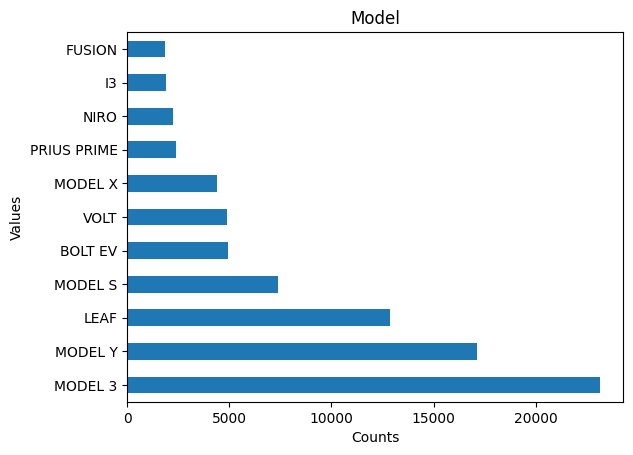


Electric Vehicle Type - value counts:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: count, dtype: int64


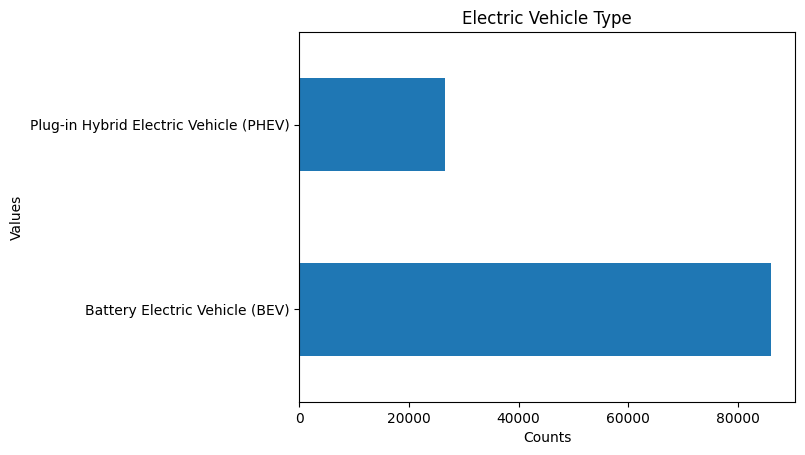


Clean Alternative Fuel Vehicle (CAFV) Eligibility - value counts:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         58639
Eligibility unknown as battery range has not been researched    39236
Not eligible due to low battery range                           14759
Name: count, dtype: int64


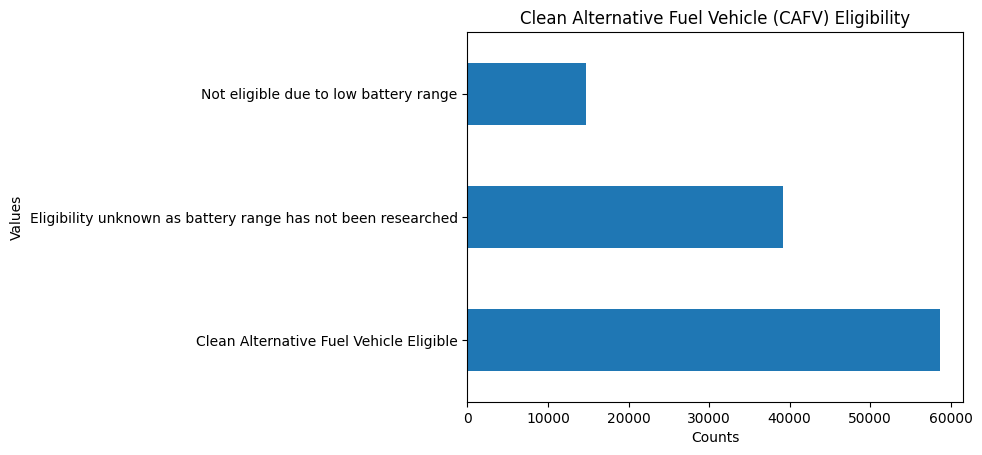


DOL Vehicle ID - value counts:
DOL Vehicle ID
198968248    1
180703806    1
475706185    1
219886068    1
303587483    1
132690547    1
172852179    1
218915427    1
121879635    1
289370903    1
151215242    1
Name: count, dtype: int64


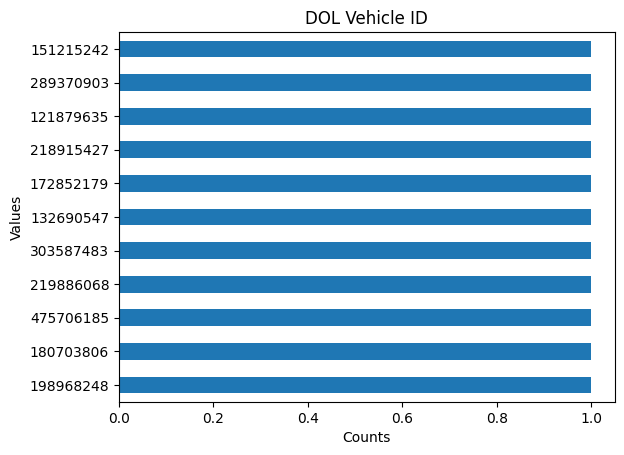


Vehicle Location - value counts:
Vehicle Location
POINT (-122.13158 47.67858)    2916
POINT (-122.2066 47.67887)     2059
POINT (-122.1872 47.61001)     2001
POINT (-122.31765 47.70013)    1880
POINT (-122.12096 47.55584)    1852
POINT (-122.21061 47.83448)    1850
POINT (-122.15545 47.75448)    1661
POINT (-122.21238 47.57816)    1639
POINT (-122.02054 47.60326)    1594
POINT (-122.22901 47.72201)    1578
POINT (-122.35436 47.67596)    1507
Name: count, dtype: int64


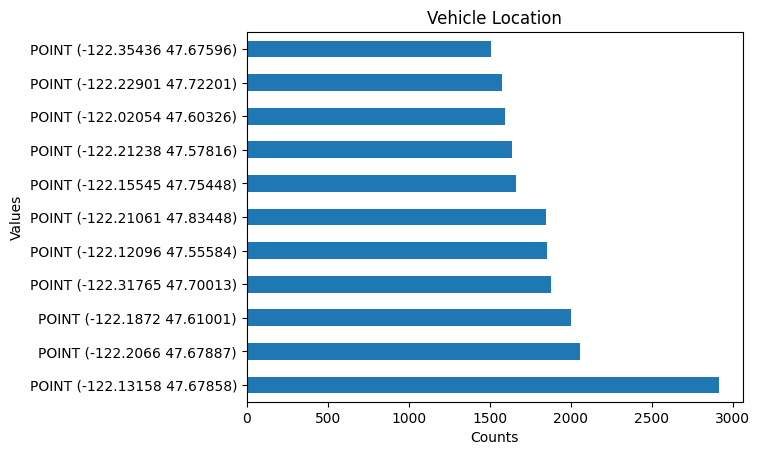


Electric Utility - value counts:
Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                      40247
PUGET SOUND ENERGY INC                                                             22172
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                       21447
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                    6522
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY     5053
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                  2671
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY          1679
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                          1010
PACIFICORP                                                                           847
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY                           802
BONNEVILLE POWER ADMINISTRATION||ORCAS POWER & LIGHT COOP  

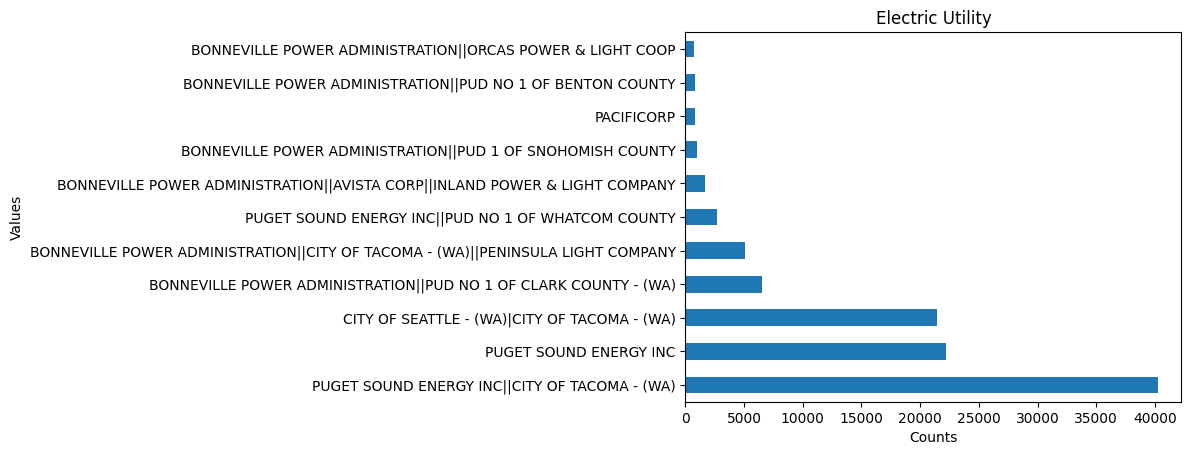


2020 Census Tract - value counts:
2020 Census Tract
53033028500    583
53033032321    550
53033007800    419
53033024100    401
53033005600    394
53033024500    388
53033008500    386
53033025006    385
53033032318    380
53033032220    373
53033024601    360
Name: count, dtype: int64


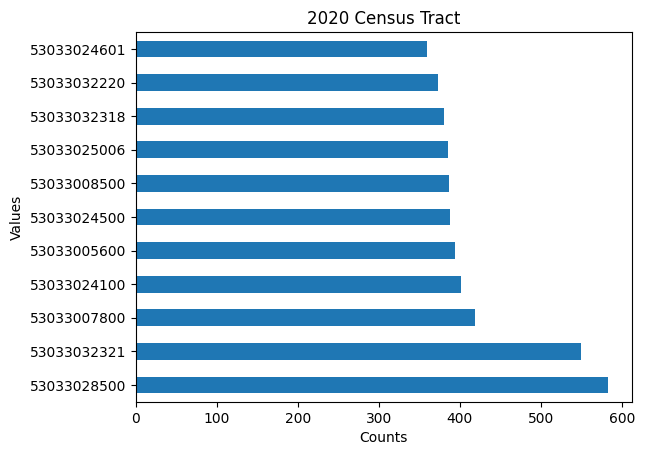

In [26]:
# Loop through each categorical column
for col in categorical_columns:
    print(f"\n{col} - value counts:")

    # Get the top 11 value counts
    value_counts = df[col].value_counts().head(11)
    print(value_counts)

    # Plot the value counts
    value_counts.plot(kind="barh", title=col)
    plt.xlabel("Counts")
    plt.ylabel("Values")
    plt.show()  # Show the plot

    print("="*100)


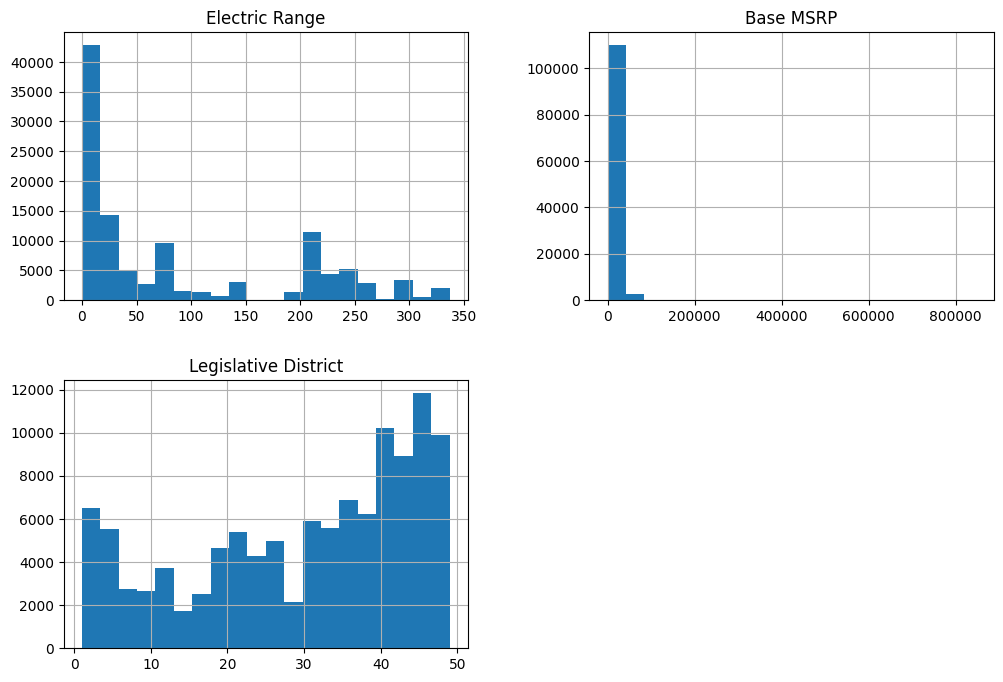

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for continuous variables
continuous_cols = df.select_dtypes(include=["int", "float"]).columns
df[continuous_cols].hist(bins=20, figsize=(12, 8))
plt.show()


<ipython-input-37-7d5d2ae9b4b2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


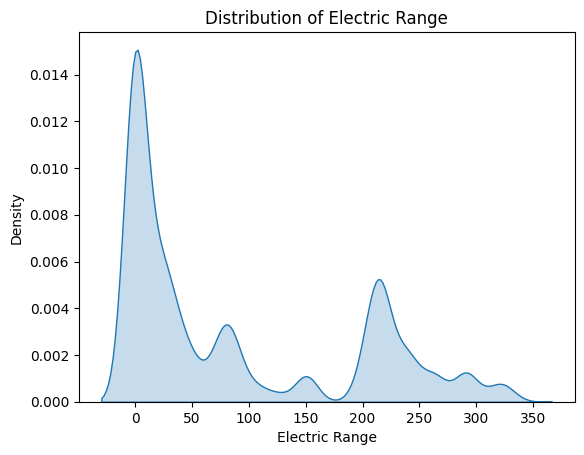

<ipython-input-37-7d5d2ae9b4b2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


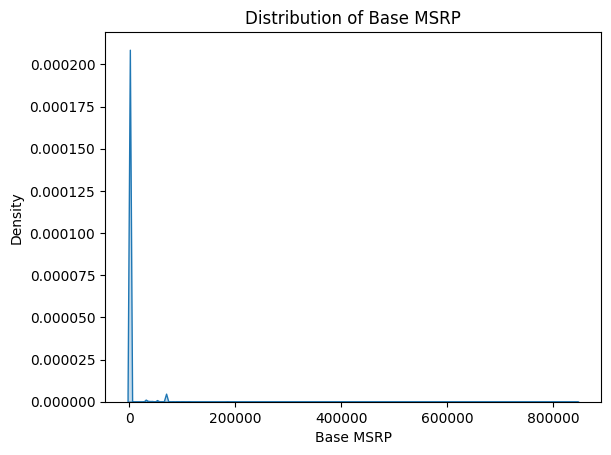

<ipython-input-37-7d5d2ae9b4b2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


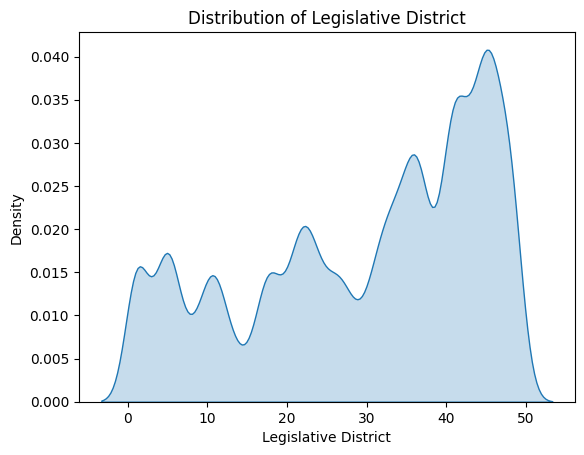

In [37]:
# Kernel Density Estimate (KDE) for continuous variables
for col in continuous_cols:
    sns.kdeplot(df[col].dropna(), shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


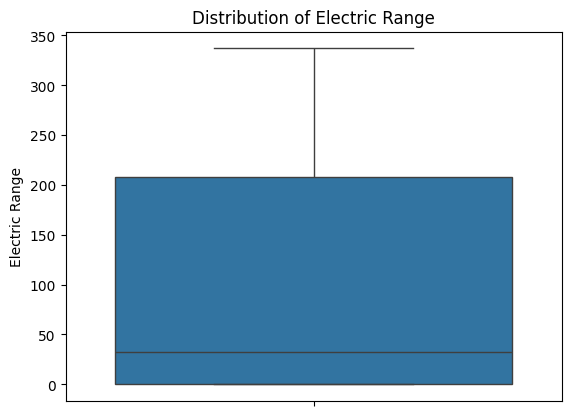

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


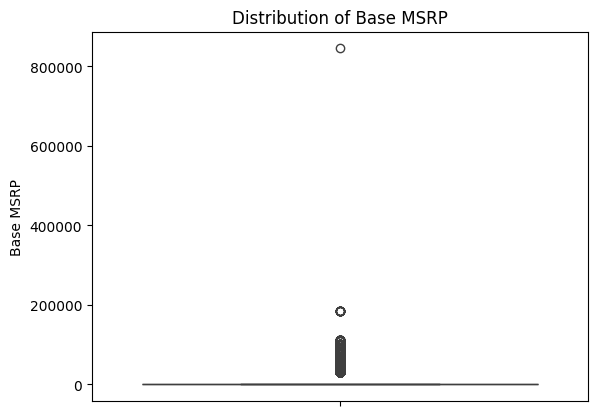

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


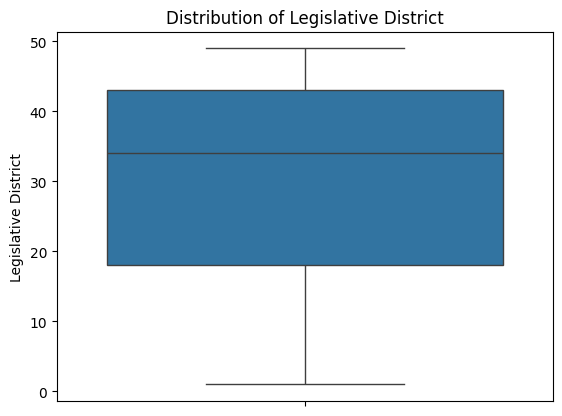

In [38]:
# Boxplot for continuous variables
for col in continuous_cols:
    sns.boxplot(df[col].dropna())
    plt.title(f'Distribution of {col}')
    plt.show()

Electric Range - Skewness: 0.817092344563263, Kurtosis: -0.8763265177079638


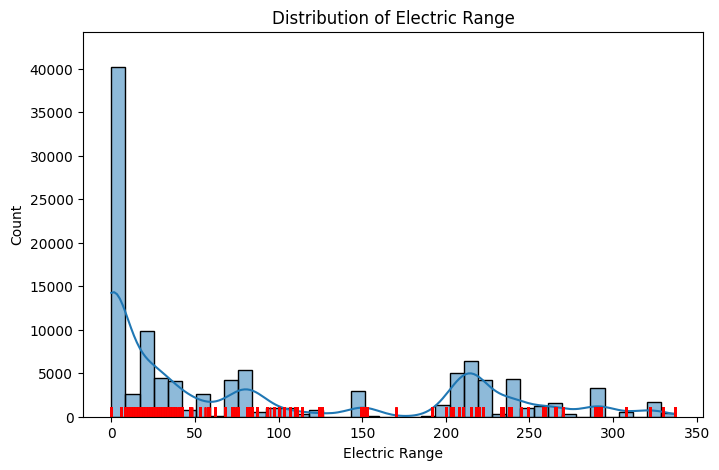

Base MSRP - Skewness: 10.100362729948008, Kurtosis: 371.67912890863744


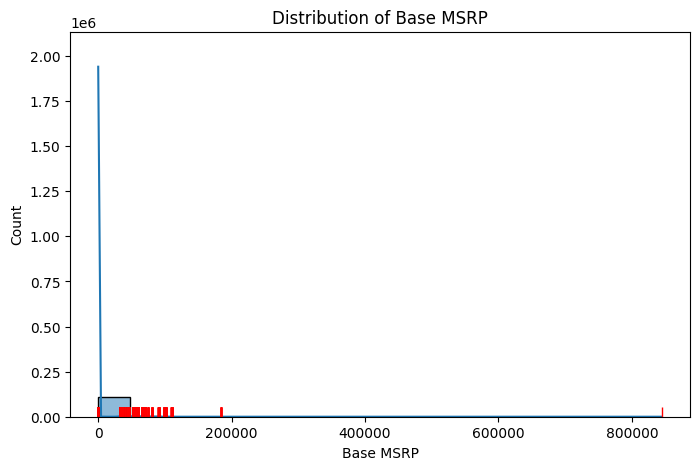

Legislative District - Skewness: -0.5423140967231422, Kurtosis: -0.9811077660645942


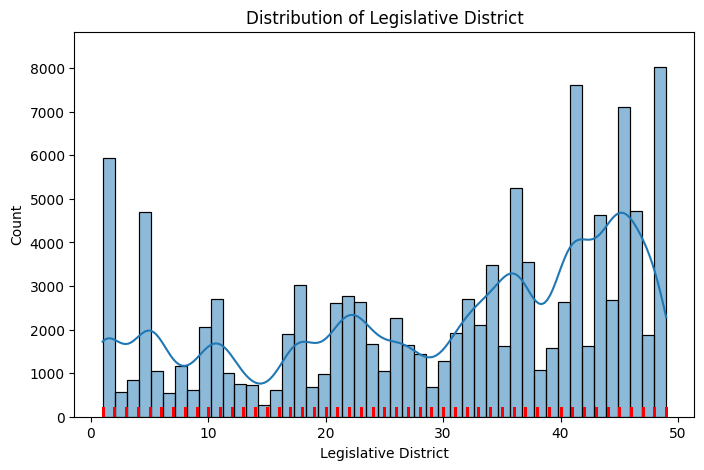

In [42]:
from scipy.stats import skew, kurtosis

# Plot distributions with KDE and rugplot
for col in continuous_cols:
    col_data = df[col].dropna()
    print(f'{col} - Skewness: {skew(col_data)}, Kurtosis: {kurtosis(col_data)}')
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True)
    sns.rugplot(df[col].dropna(), color='r')
    plt.title(f'Distribution of {col}')
    plt.show()


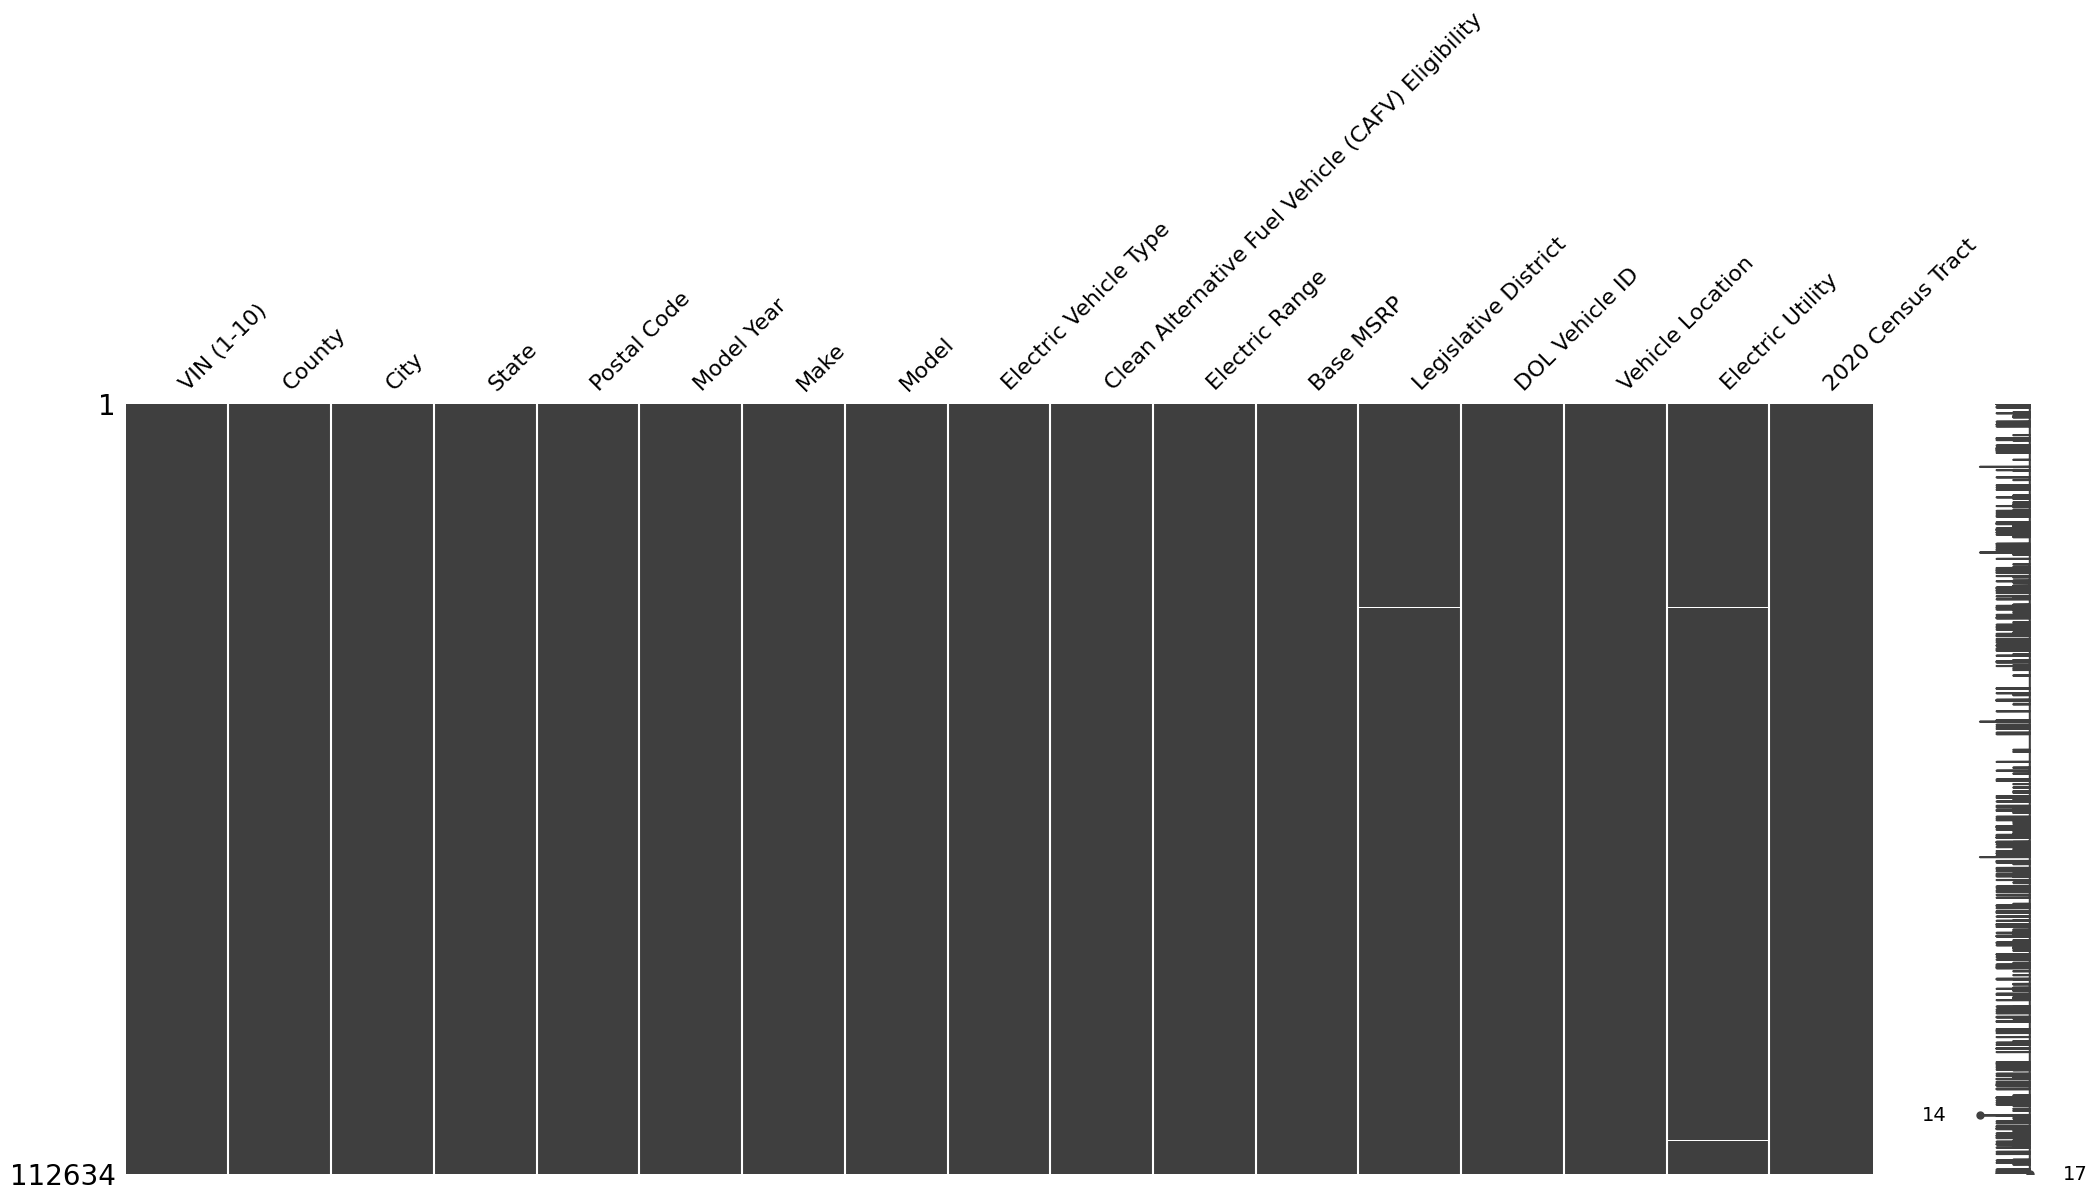

Electric Utility                                     443
Legislative District                                 286
Vehicle Location                                      24
Model                                                 20
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
DOL Vehicle ID                                         0
Base MSRP                                              0
Electric Range                                         0
Electric Vehicle Type                                  0
County                                                 0
Make                                                   0
Model Year                                             0
Postal Code                                            0
State                                                  0
City                                                   0
2020 Census Tract                                      0
dtype: int64


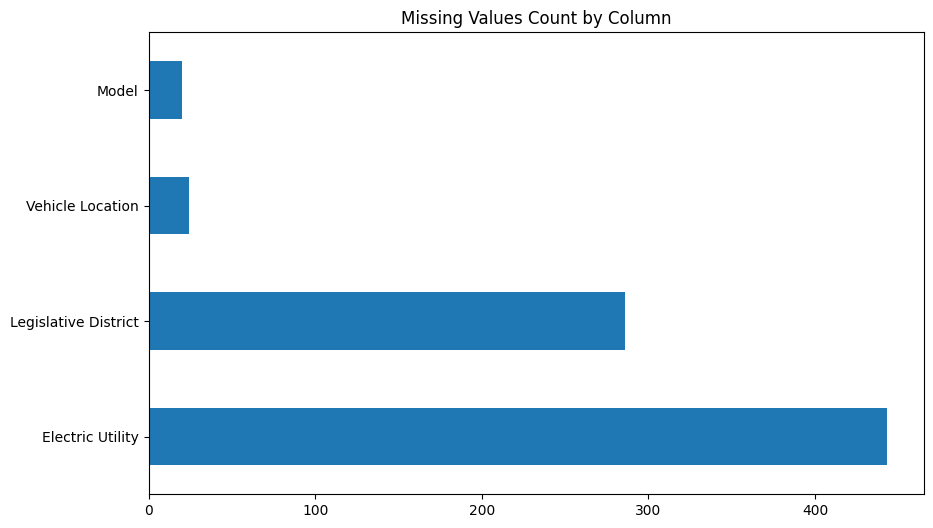

In [43]:
# Visualizing missing data
import missingno as msno

# Plot missing data heatmap
msno.matrix(df)
plt.show()

# Count of missing values per column
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts)

# Visualizing missing values in a bar plot
missing_counts = missing_counts[missing_counts > 0]  # Only show columns with missing values
missing_counts.plot(kind='barh', figsize=(10, 6))
plt.title('Missing Values Count by Column')
plt.show()


# Bivariate Data Analysis

In [ ]:
# Box plot of Base MSRP by Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='Base MSRP', y='Make', data=df)
plt.title('Base MSRP by Vehicle Make')
plt.show()

In [46]:
continuous_cols.tolist()

['Electric Range', 'Base MSRP', 'Legislative District']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


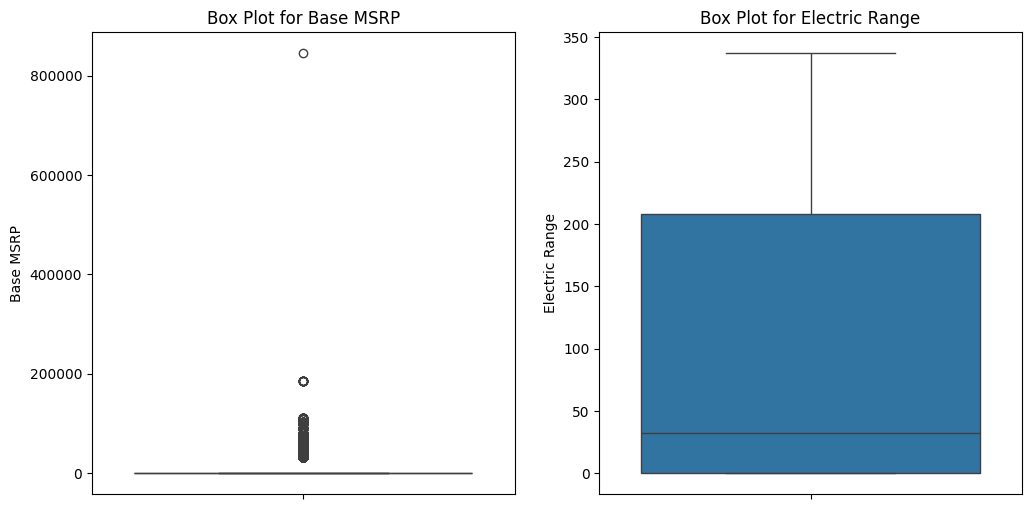

In [47]:
# Box plot for Base MSRP and Electric Range
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y='Base MSRP', data=df, ax=axes[0])
axes[0].set_title('Box Plot for Base MSRP')

sns.boxplot(y='Electric Range', data=df, ax=axes[1])
axes[1].set_title('Box Plot for Electric Range')

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


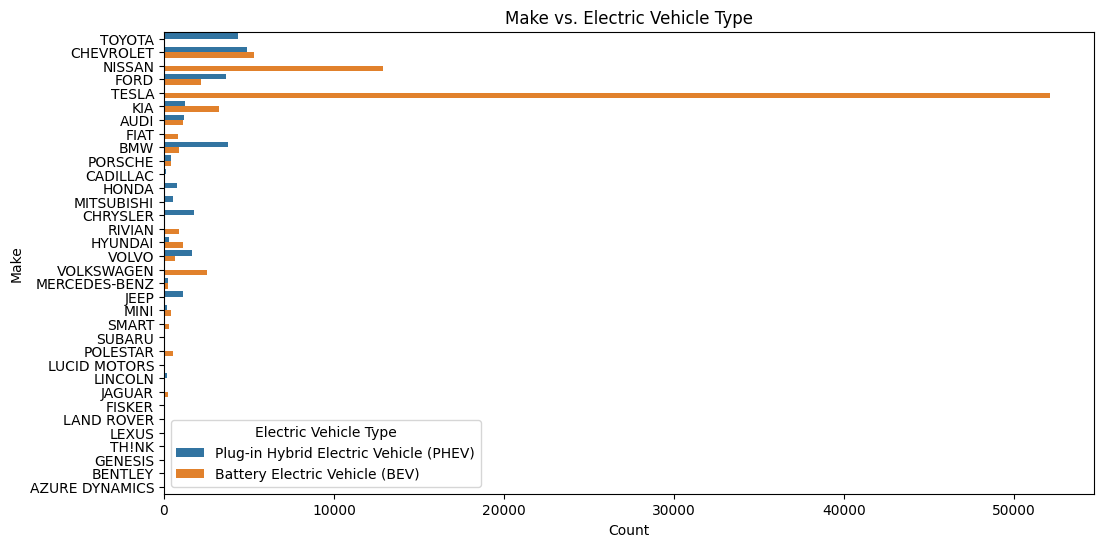

Electric Vehicle Type  Battery Electric Vehicle (BEV)  Plug-in Hybrid Electric Vehicle (PHEV)
Make                                                                                         
AUDI                                             1126                                    1206
AZURE DYNAMICS                                      7                                       0
BENTLEY                                             0                                       3
BMW                                               905                                    3775
CADILLAC                                            0                                     108
CHEVROLET                                        5286                                    4896
CHRYSLER                                            0                                    1794
FIAT                                              822                                       0
FISKER                                              0       

In [49]:
# Categorical vs. Categorical using Count Plots
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Make', hue='Electric Vehicle Type')
plt.title('Make vs. Electric Vehicle Type')
plt.xlabel('Count')
plt.ylabel('Make')
plt.legend(title='Electric Vehicle Type')
plt.show()

# Using pivot tables for more insights
make_ev_type_counts = pd.crosstab(df['Make'], df['Electric Vehicle Type'])
print(make_ev_type_counts)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


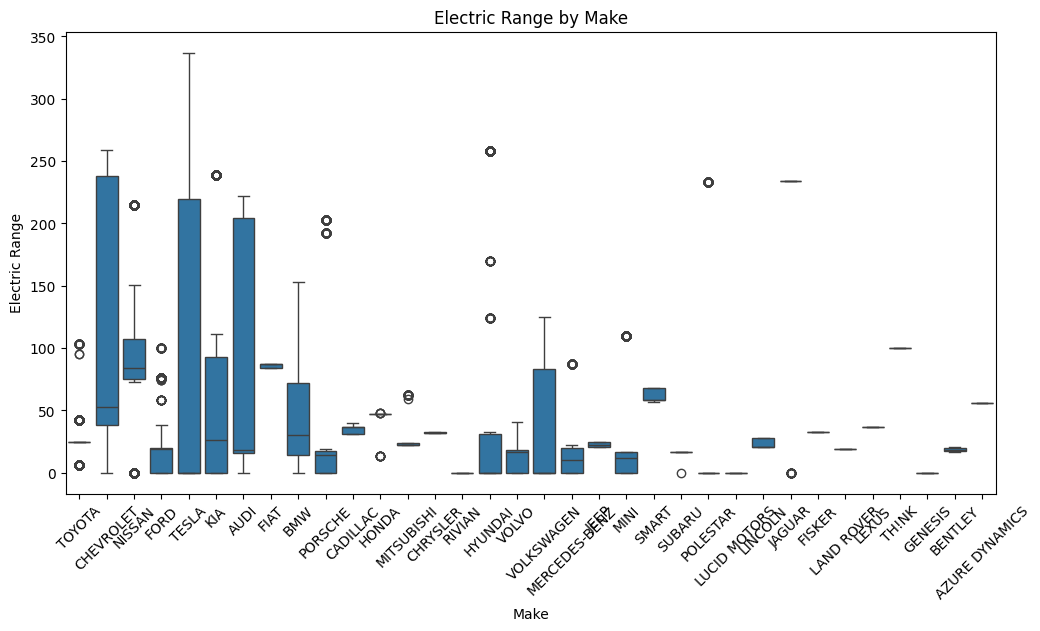

In [50]:
# Box plot of Electric Range by Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Electric Range', data=df)
plt.xticks(rotation=45)
plt.title('Electric Range by Make')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


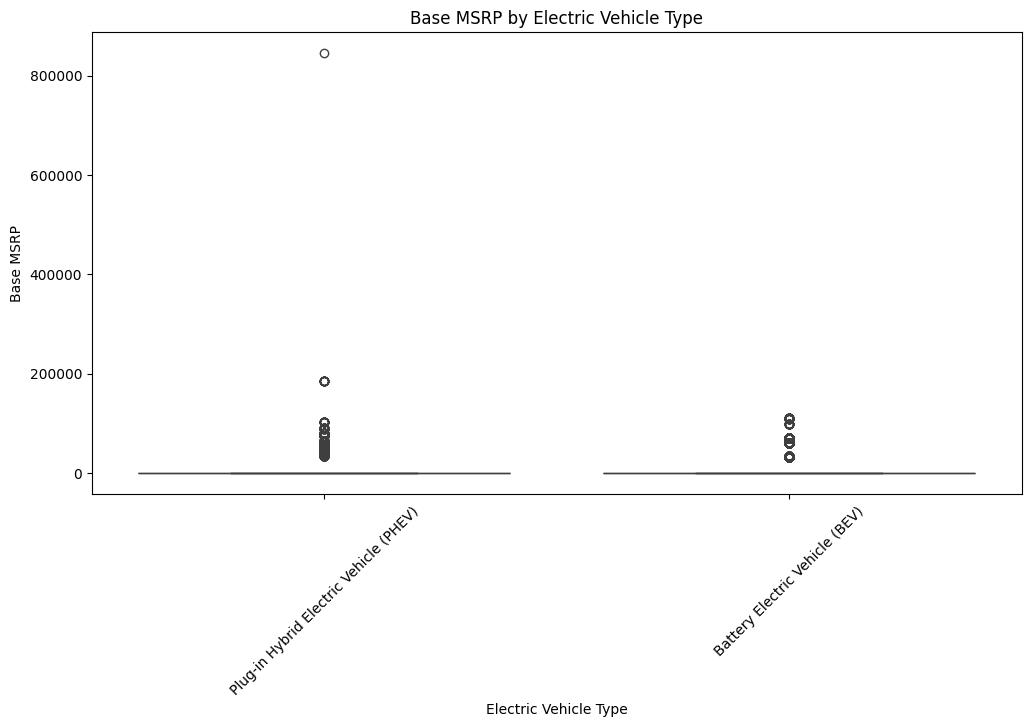

In [51]:
# Box plot of Base MSRP by Electric Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.xticks(rotation=45)
plt.title('Base MSRP by Electric Vehicle Type')
plt.show()

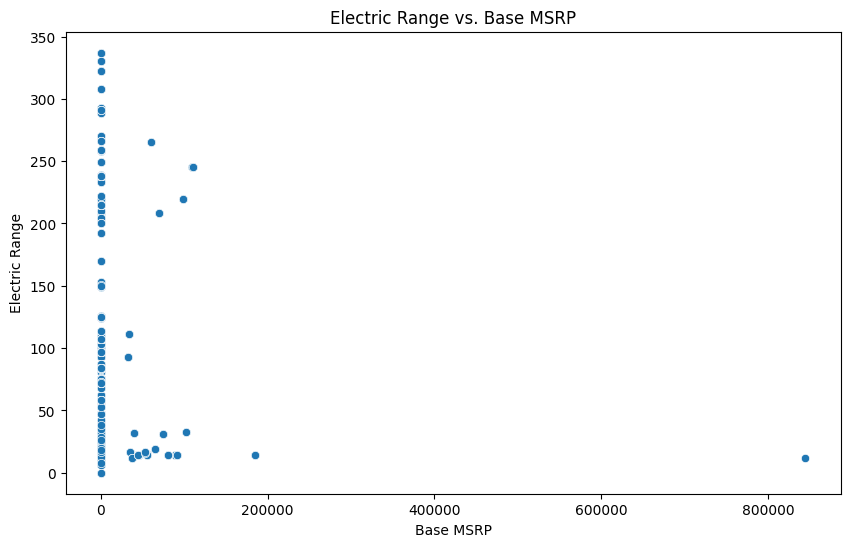

In [52]:
# Scatter plot between Electric Range and Base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.show()

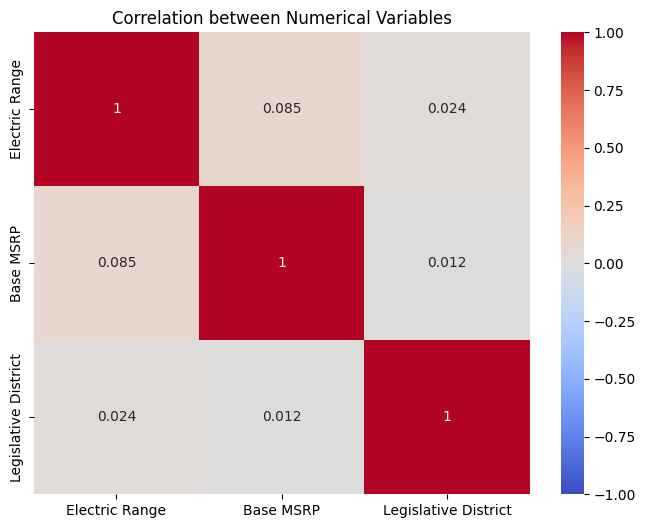

In [54]:
# Correlation matrix for numerical variables
corr_matrix = df[continuous_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Numerical Variables')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


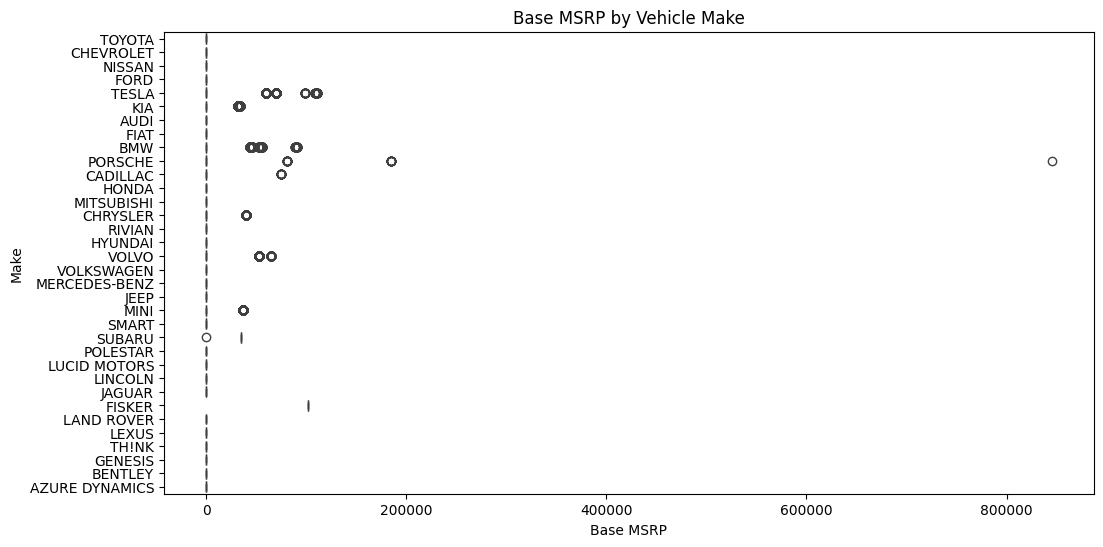

In [55]:
# Box plot of Base MSRP by Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='Base MSRP', y='Make', data=df)
plt.title('Base MSRP by Vehicle Make')
plt.show()


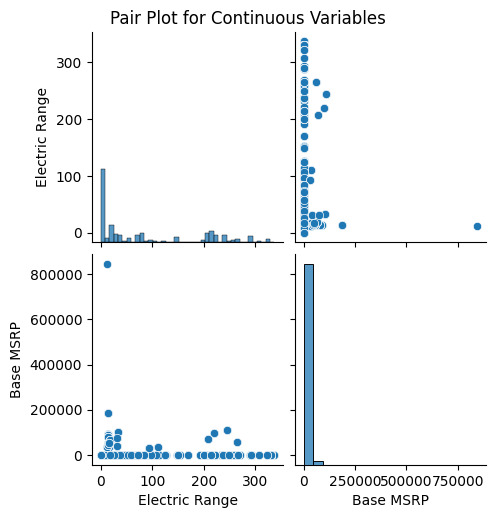

In [56]:
# Pair plot for continuous variables
sns.pairplot(df[['Electric Range', 'Base MSRP', 'Model Year']])
plt.suptitle('Pair Plot for Continuous Variables', y=1.02)
plt.show()


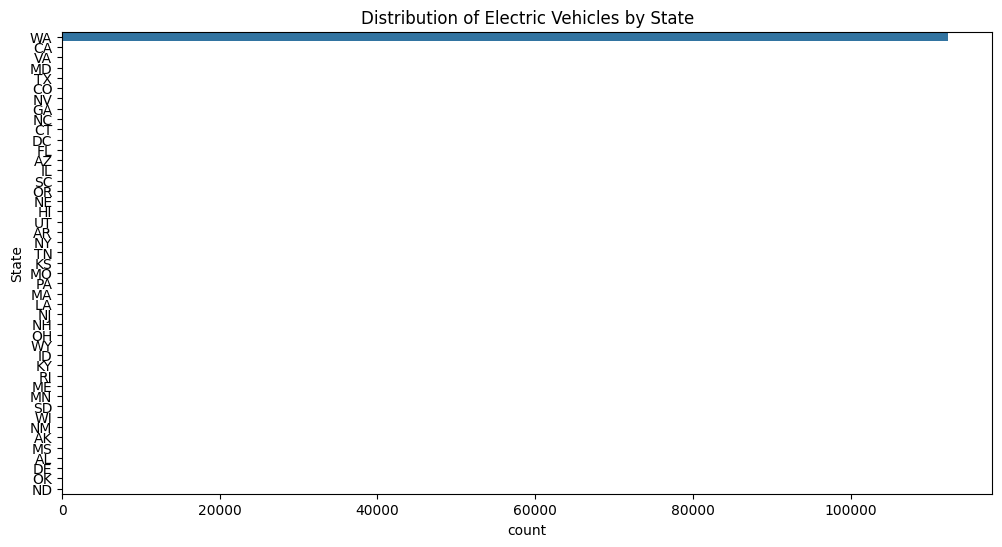

In [57]:
# Count plot of EVs by State
plt.figure(figsize=(12, 6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.title('Distribution of Electric Vehicles by State')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


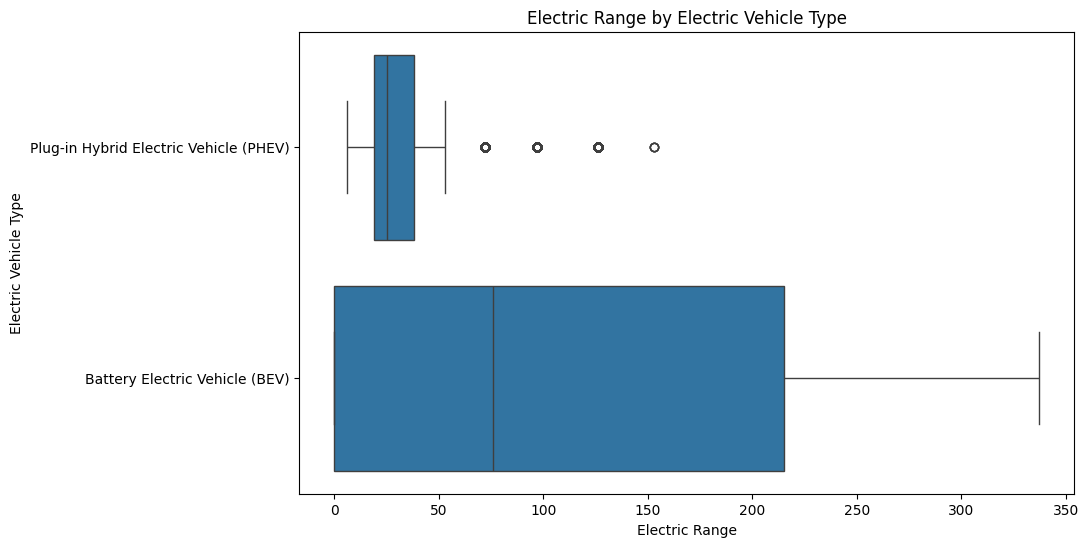

In [58]:
# Box plot of Electric Range by Electric Vehicle Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Range', y='Electric Vehicle Type', data=df)
plt.title('Electric Range by Electric Vehicle Type')
plt.show()


In [59]:
df.head(2)

VIN (1-10)  County      City State Postal Code Model Year       Make       Model                   Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District DOL Vehicle ID             Vehicle Location Electric Utility 2020 Census Tract
0  JTMEB3FV6N  Monroe  Key West    FL       33040       2022     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              42          0                   NaN      198968248    POINT (-81.80023 24.5545)              NaN       12087972100
1  1G1RD6E45D   Clark  Laughlin    NV       89029       2013  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              38          0                   NaN        5204412  POINT (-114.57245 35.16815)              NaN       32003005702

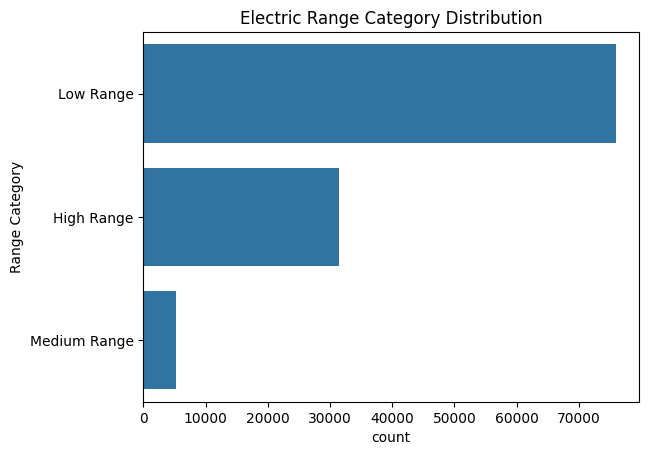

In [60]:
# Creating a new feature based on Electric Range
def categorize_range(x):
    if x < 100:
        return 'Low Range'
    elif 100 <= x < 200:
        return 'Medium Range'
    else:
        return 'High Range'

df['Range Category'] = df['Electric Range'].apply(categorize_range)

# Visualizing new Range Categories
sns.countplot(y='Range Category', data=df)
plt.title('Electric Range Category Distribution')
plt.show()

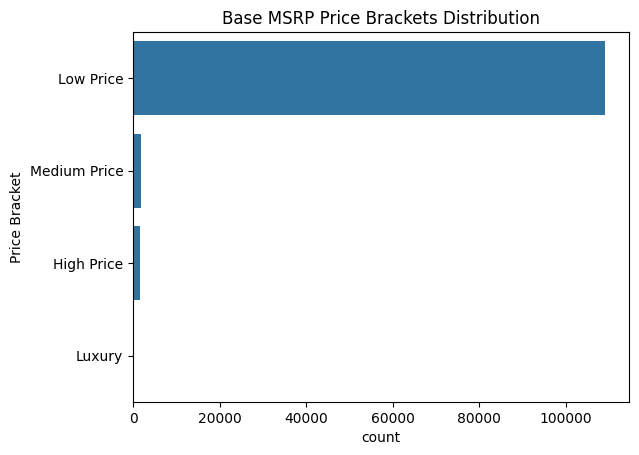

In [61]:
# Creating price brackets for Base MSRP
bins = [0, 30000, 60000, 100000, df['Base MSRP'].max()]
labels = ['Low Price', 'Medium Price', 'High Price', 'Luxury']

df['Price Bracket'] = pd.cut(df['Base MSRP'], bins=bins, labels=labels, include_lowest=True)

# Visualizing the price brackets
sns.countplot(y='Price Bracket', data=df)
plt.title('Base MSRP Price Brackets Distribution')
plt.show()


In [62]:
df.head(2)

VIN (1-10)  County      City State Postal Code Model Year       Make       Model                   Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District DOL Vehicle ID             Vehicle Location Electric Utility 2020 Census Tract Range Category Price Bracket
0  JTMEB3FV6N  Monroe  Key West    FL       33040       2022     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              42          0                   NaN      198968248    POINT (-81.80023 24.5545)              NaN       12087972100      Low Range     Low Price
1  1G1RD6E45D   Clark  Laughlin    NV       89029       2013  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              38          0                   NaN        5204412  POINT (-114.57245 35.16815)              NaN       32003005702      Low Range     Low Price

In [63]:
# Count of vehicles by Model Year and County
vehicles_by_year_county = df.groupby(['Model Year', 'County']).size().reset_index(name='Vehicle Count')

# Count of vehicles by Model Year and City
vehicles_by_year_city = df.groupby(['Model Year', 'City']).size().reset_index(name='Vehicle Count')

# Count of vehicles by Model Year and State
vehicles_by_year_state = df.groupby(['Model Year', 'State']).size().reset_index(name='Vehicle Count')

# Show the aggregated data
print("Vehicles by Year and County:")
display(vehicles_by_year_county.head())
print("\nVehicles by Year and City:")
display(vehicles_by_year_city.head())
print("\nVehicles by Year and State:")
display(vehicles_by_year_state.head())


Vehicles by Year and County:


Model Year     County  Vehicle Count
0       1997  Snohomish              1
1       1998    Clallam              1
2       1999     Pierce              1
3       1999     Skagit              1
4       1999    Whatcom              1


Vehicles by Year and City:


Model Year          City  Vehicle Count
0       1997    Marysville              1
1       1998        Sequim              1
2       1999        Deming              1
3       1999        Graham              1
4       1999  Mount Vernon              1


Vehicles by Year and State:


Model Year State  Vehicle Count
0       1997    WA              1
1       1998    WA              1
2       1999    WA              3
3       2000    WA             10
4       2002    WA              2

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

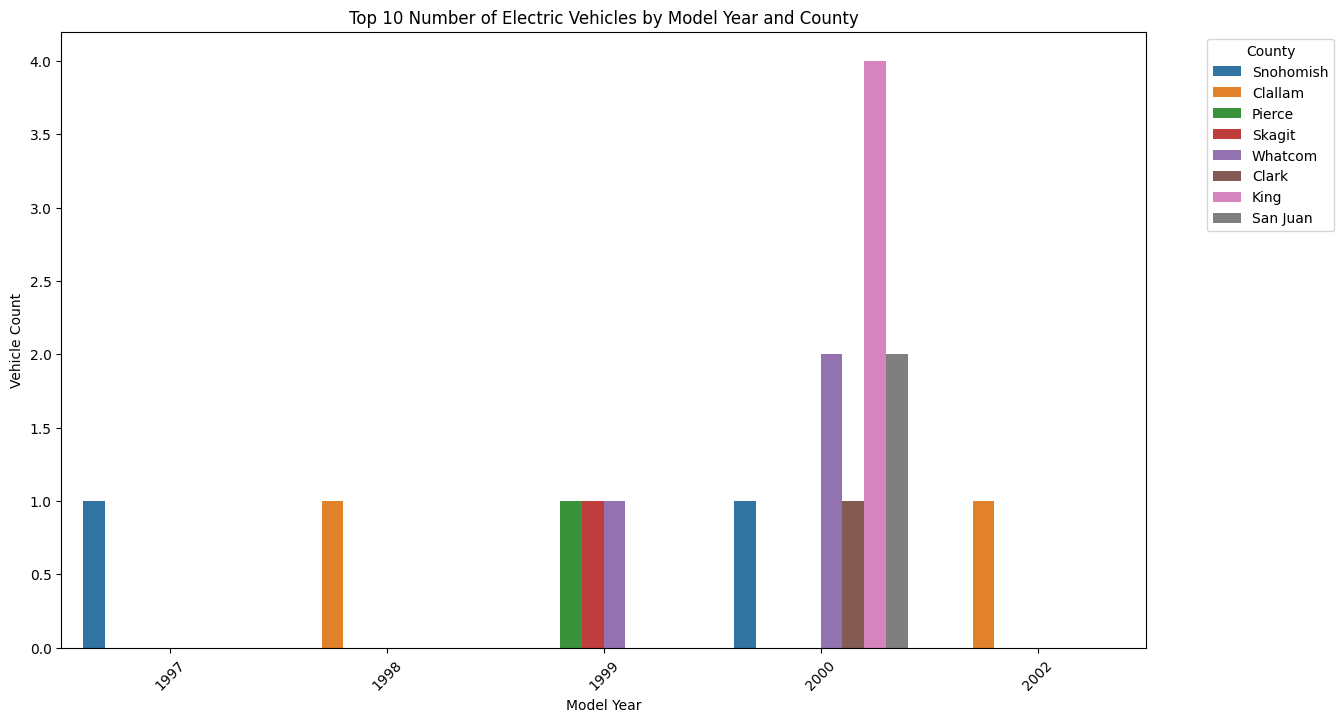

In [65]:
# Plotting number of vehicles by Model Year and County
plt.figure(figsize=(14, 8))
sns.barplot(data=vehicles_by_year_county[0:11], x='Model Year', y='Vehicle Count', hue='County', estimator=sum)
plt.title('Top 10 Number of Electric Vehicles by Model Year and County')
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Vehicle Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

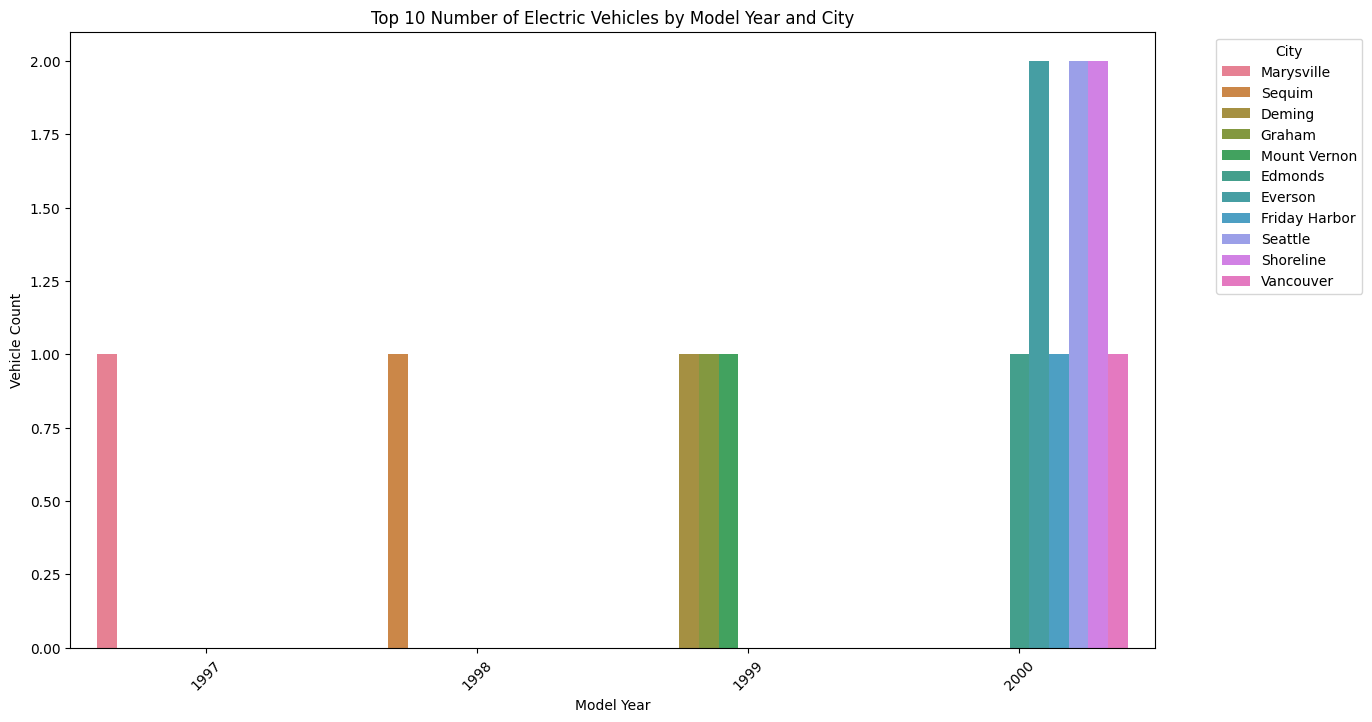

In [66]:
# Plotting number of vehicles by Model Year and City
plt.figure(figsize=(14, 8))
sns.barplot(data=vehicles_by_year_city[0:11], x='Model Year', y='Vehicle Count', hue='City', estimator=sum)
plt.title('Top 10 Number of Electric Vehicles by Model Year and City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Vehicle Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

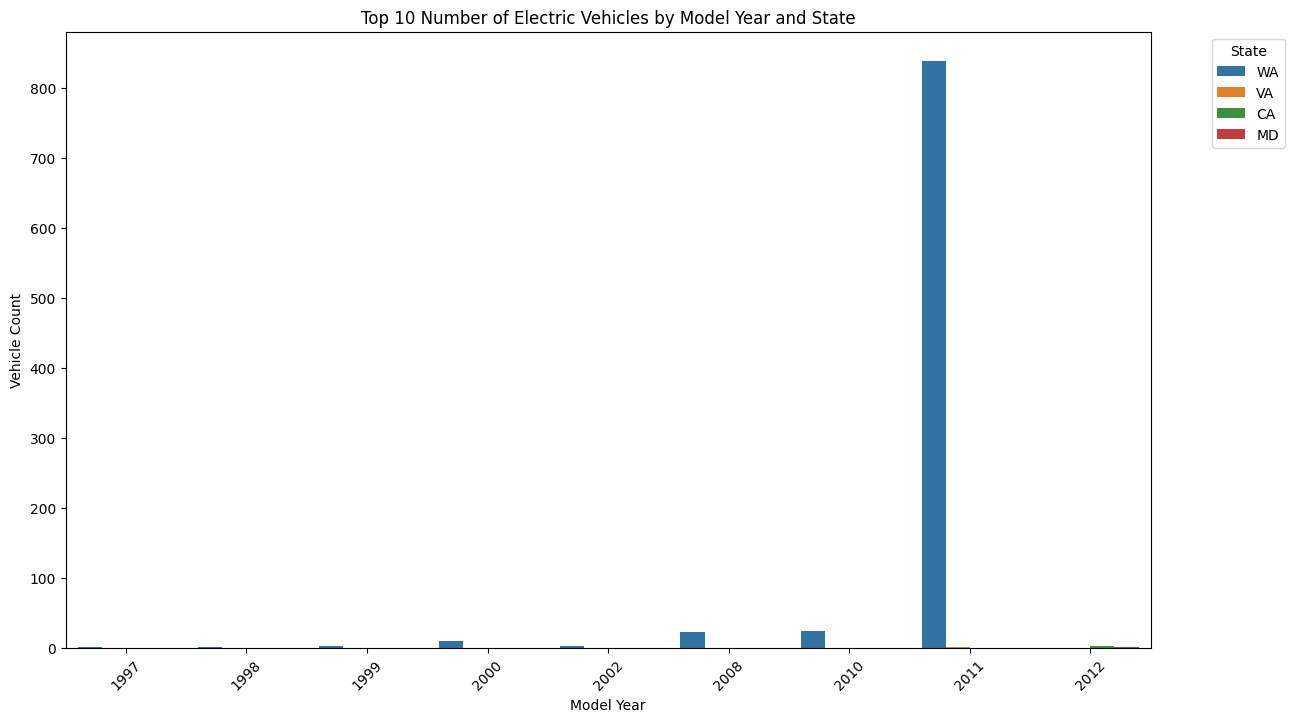

In [67]:
# Plotting number of vehicles by Model Year and State
plt.figure(figsize=(14, 8))
sns.barplot(data=vehicles_by_year_state[0:11], x='Model Year', y='Vehicle Count', hue='State', estimator=sum)
plt.title('Top 10 Number of Electric Vehicles by Model Year and State')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Vehicle Count')
plt.show()


## Task2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [72]:
# Extract longitude and latitude from 'Vehicle Location'
df['longitude'] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+)')[0].astype(float)
df['latitude'] = df['Vehicle Location'].str.extract(r'(-?\d+\.\d+)\)$')[0].astype(float)

# Plot using plotly.express.scatter_geo
fig = px.scatter_geo(df,
                     lon='longitude',
                     lat='latitude',
                     hover_name='VIN (1-10)',  # Display VIN on hover
                     title="Locations of Electric Vehicles Based on VIN",
                     projection="natural earth")  # Choose a world map projection

# Show the plot
fig.show()

In [73]:
fig.write_html('Choropleth.html')


In [74]:
df.head(2)

VIN (1-10)  County      City State Postal Code Model Year       Make       Model                   Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District DOL Vehicle ID             Vehicle Location Electric Utility 2020 Census Tract Range Category Price Bracket  longitude  latitude
0  JTMEB3FV6N  Monroe  Key West    FL       33040       2022     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              42          0                   NaN      198968248    POINT (-81.80023 24.5545)              NaN       12087972100      Low Range     Low Price     -81.80     24.55
1  1G1RD6E45D   Clark  Laughlin    NV       89029       2013  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              38          0                   NaN        5204412  POINT (-114.57245 35.16815)              NaN       32003005702      Low Range     Low Price    -114.57     35.17

# Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [75]:
import plotly.express as px

# Group by 'Model Year' and 'Make', then count the number of vehicles (VIN) for each make per year
df_grouped = df.groupby(['Model Year', 'Make'])['VIN (1-10)'].count().reset_index()
df_grouped.columns = ['Model Year', 'Make', 'Count']

fig = px.bar(df_grouped, x='Make', y='Count', color='Make',
             animation_frame='Model Year', animation_group='Make',
             # range_y=[0, df_grouped['Count'].max() + 100],
             range_y=[0, (df_grouped['Count'].max() // 10 + 1) * 10],  # Adjusted range_y
             title='EV Makes Count Over Years')

fig.update_layout(xaxis_title='Model Make', yaxis_title='Count',
                  yaxis=dict(tickmode='linear', tick0=0, dtick=1000))  # Adjusted y-axis ticks

# fig.update_layout(xaxis_title='Model Year', yaxis_title='Count')
fig.show()

In [76]:
fig.write_html('racing_bar_plot.html')
